# HW5 YusongChen 306315484
# Deal with Imbalanced Data and Do the Comparision across different classifiers and resampling methods

# 0.) Import the Credit Card Fraud Data From CCLE

In [1]:
import pandas as pd
# from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# drive.mount('/content/gdrive/', force_remount = True)

In [3]:
df = pd.read_csv("fraudTest.csv")

In [4]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

/var/folders/nd/lm4h80x91b95pf3z0v5cvt1c0000gn/T/ipykernel_3096/2282180580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
/var/folders/nd/lm4h80x91b95pf3z0v5cvt1c0000gn/T/ipykernel_3096/2282180580.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [8]:
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test, test_size = .5)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_holdout = scaler.transform(X_holdout)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [10]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [11]:
ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler()
under_X, under_y = rus.fit_resample(X_train, y_train)

smote = SMOTE()
smote_X, smote_y = smote.fit_resample(X_train, y_train)

# 3.) Train three logistic regression models

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
over_log = LogisticRegression().fit(over_X, over_y)

under_log = LogisticRegression().fit(under_X, under_y)

smote_log = LogisticRegression().fit(smote_X, smote_y)

# 4.) Test the three models

In [14]:
over_log.score(X_test, y_test)

0.9234026728088486

In [15]:
under_log.score(X_test, y_test)

0.9402936730727705

In [16]:
smote_log.score(X_test, y_test)

0.924062477506658

In [17]:
# We see SMOTE performing with higher accuracy but is ACCURACY really the best measure?

In [18]:
# over_log.score? - Smote is used to check the prediction's accuracy

# 5.) Which performed best in Out of Sample metrics?

In [19]:
# Sensitivity here in credit fraud is more important as seen from last class

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
y_true = y_test

In [22]:
y_pred = over_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[76742,  6300],
       [   85,   231]])

In [23]:
print("Over Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Over Sample Sensitivity :  0.7310126582278481


In [24]:
y_pred = under_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[78152,  4890],
       [   87,   229]])

In [25]:
print("Under Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Under Sample Sensitivity :  0.7246835443037974


In [26]:
y_pred = smote_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[76797,  6245],
       [   85,   231]])

In [27]:
print("SMOTE Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

SMOTE Sample Sensitivity :  0.7310126582278481


# 6.) Pick two features and plot the two classes before and after SMOTE.

In [28]:
X_train_cp, X_test_cp, y_train_cp, y_test_cp = train_test_split(X, y, test_size = .3)

In [29]:
raw_temp = pd.concat([X_train_cp,y_train_cp], axis =1)

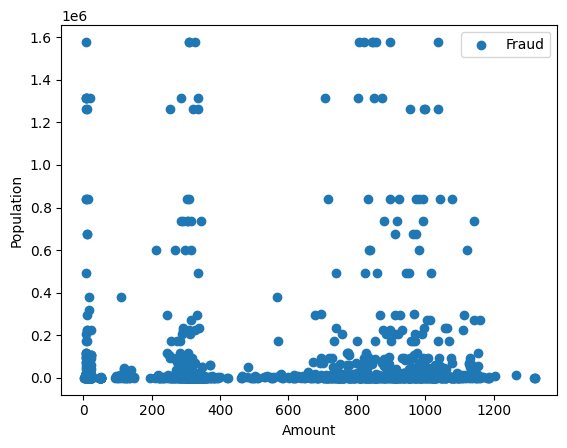

In [30]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend(["Fraud", "Not Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

In [31]:
smote_X_cp, smote_y_cp = smote.fit_resample(X_train_cp, y_train_cp)

In [32]:
raw_temp = pd.concat([smote_X_cp, smote_y_cp], axis =1)

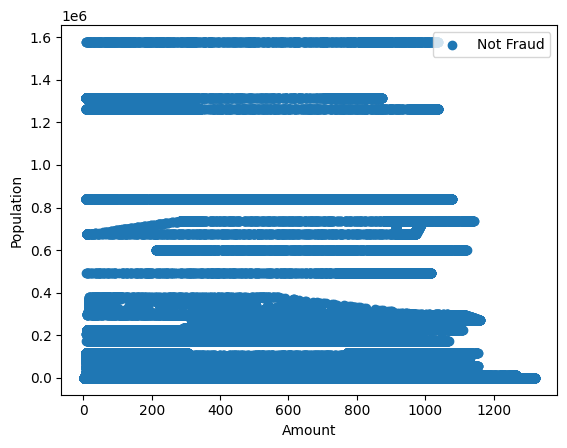

In [33]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend([ "Not Fraud", "Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

# 7.) We want to compare oversampling, Undersampling and SMOTE across our 3 models (Logistic Regression, Logistic Regression Lasso and Decision Trees).

# Make a dataframe that has a dual index and 9 Rows.
# Calculate: Sensitivity, Specificity, Precision, Recall and F1 score. for out of sample data.
# Notice any patterns across perfomance for this model. Does one totally out perform the others IE. over/under/smote or does a model perform better DT, Lasso, LR?
# Choose what you think is the best model and why. test on Holdout

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd

In [35]:
resampling_methods = {
    "over" : RandomOverSampler(),
    "under" : RandomUnderSampler(),
    "smote": SMOTE()
}

model_configs = {
    "LOG" : LogisticRegression(),
    "LASSO" : LogisticRegression(penalty = "l1",C = 2.,solver = "liblinear"), #this is logistic loss, cannot use siklearn lasso
    "DTREE" : DecisionTreeClassifier()
}

In [36]:
trained_models = {}

In [37]:
def calc_perf_metric(y_true,y_pred):
    
    tn,fp,fn,tp = confusion_matrix(y_true,y_pred).ravel()
        
    sensitivity = tp/(tp+fn)
    specificity = tn/(tn+fp)
    precision = precision_score(y_true,y_pred)
    recall = recall_score(y_true,y_pred)
    f1 = f1_score(y_true,y_pred)
    
    return(sensitivity, specificity, precision, recall, f1)

In [38]:
results = []

In [39]:
for resample_key, resampler in resampling_methods.items():
    
    resample_X,resample_y = resampler.fit_resample(X_train,y_train)
    
    for model_key,model in model_configs.items():
        
        combined_key = f"{resample_key}_{model_key}"
        
        m = model.fit(resample_X,resample_y)
        
        trained_models[combined_key] = m
        
        y_pred = m.predict(X_test)
        

        sensitivity, specificity, precision, recall, f1 = calc_perf_metric(y_test,y_pred)
        
        results.append({
            "Model" : combined_key,
            "Sensitivity" : sensitivity,
            "Specificity" : specificity,
            "Precision" : precision,
            "Recall": recall,
            "F1" : f1
        })
    

In [40]:
# ?confusion_matrix
# confusion_matrix().ravel()

In [41]:
trained_models["key1"] = "values1"

In [42]:
results_df = pd.DataFrame(results)
results_df

,Model,Sensitivity,Specificity,Precision,Recall,F1
0,over_LOG,0.731013,0.924616,0.035588,0.731013,0.067871
1,over_LASSO,0.731013,0.924653,0.035604,0.731013,0.067901
2,over_DTREE,0.582278,0.998519,0.599349,0.582278,0.590690
3,under_LOG,0.727848,0.942041,0.045608,0.727848,0.085837
4,under_LASSO,0.727848,0.942029,0.045599,0.727848,0.085821
5,under_DTREE,0.965190,0.945341,0.062964,0.965190,0.118217
6,smote_LOG,0.731013,0.924014,0.035316,0.731013,0.067376
7,smote_LASSO,0.731013,0.923954,0.035289,0.731013,0.067327
8,smote_DTREE,0.699367,0.992690,0.266908,0.699367,0.386364


### In this case, we think highly of the precision, recall and F1 score. Comparing with other classifiers, we can tell that the DecisionTree  performs extremly well regarding of the F1 score and Precision but has relatively low recall value. As for the resampling method,  over-sampling is pretty good with the highest F1-score and precision but just relatively lower recall. So all in all, the Over-DecisionTree model will be the best model in this case.